In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import pandas as pd


In [2]:
import matplotlib

In [3]:
matplotlib.__version__

'3.4.3'

In [4]:
df = pd.read_excel('Tabela Final.xlsx')

In [5]:
df

,Unnamed: 0,Data,Produto,Quantidade,Cod,Grupo
0,0,2019-04-03,(11009959)MODULO SELETORA DE AUDIO NOVO,12,11009959,DG7
1,1,2019-04-03,(11384826)RELE TEMPORIZADOR,2,11384826,Outros
2,2,2019-04-03,(10908310)PAINEL SELETORA,40,10908310,SDD
3,3,2019-04-03,(10674812)PAINEL SELETORA (SELETORA),10,10674812,SG7
4,4,2019-04-05,(10527249)ANUNCIADOR FECHAMENTO DE PORTAS,3,10527249,Outros
...,...,...,...,...,...,...
3756,968,2021-12-16,(11643930)PAINEL SELETORA G7 CAN,30,11643930,SG7
3757,969,2021-12-16,(11643930)PAINEL SELETORA G7 CAN,10,11643930,SG7
3758,970,2021-12-16,(964)MODULO SELETORA DE AUDIO DD CAN,1,964,Outros
3759,971,2021-12-16,(937)PAINEL SELETORA DD CAN,4,937,Outros


<BarContainer object of 5 artists>

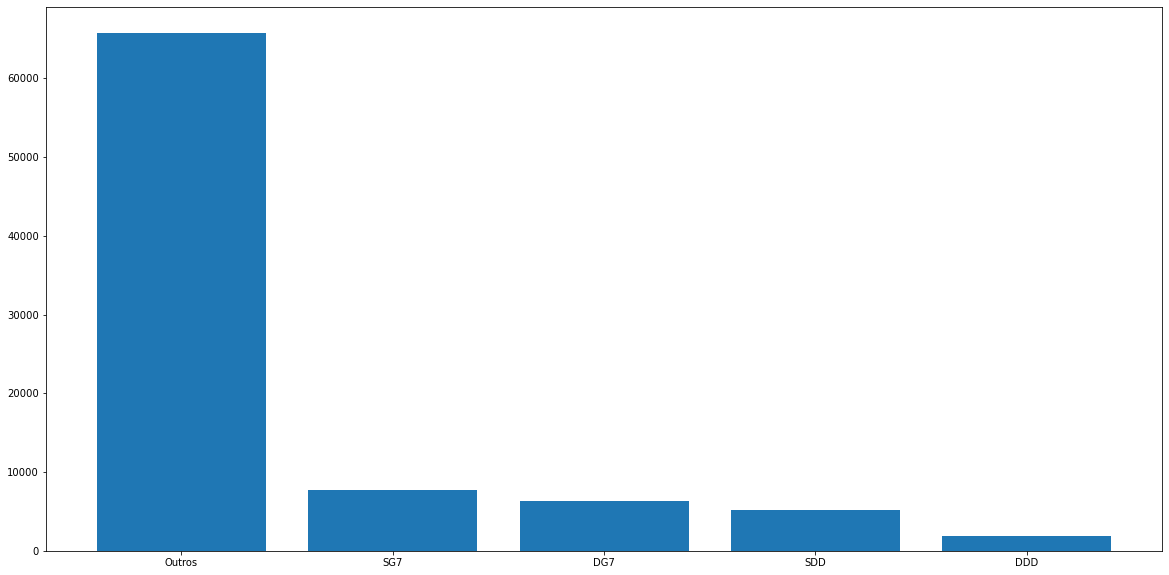

In [6]:

plt.figure(figsize=(20,10))
graf = df[['Quantidade', 'Grupo']].groupby('Grupo').Quantidade.sum().sort_values(ascending=False)
plt.bar(graf.index, graf.values)


Text(0.5, 1.0, 'sazonalidade po mês')

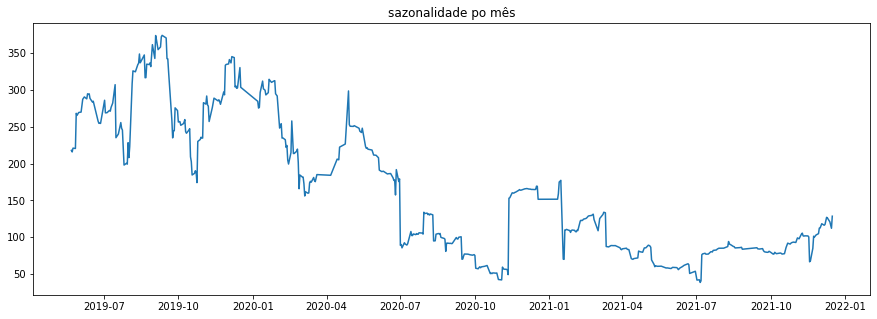

In [7]:
plt.figure(figsize=(15,5))
graf_dados7 = df[['Quantidade','Data']].groupby('Data').sum().rolling(30).mean()
plt.plot(graf_dados7.index, graf_dados7.values)
plt.title('sazonalidade po mês')

Text(0.5, 1.0, 'sazonalidade por semana')

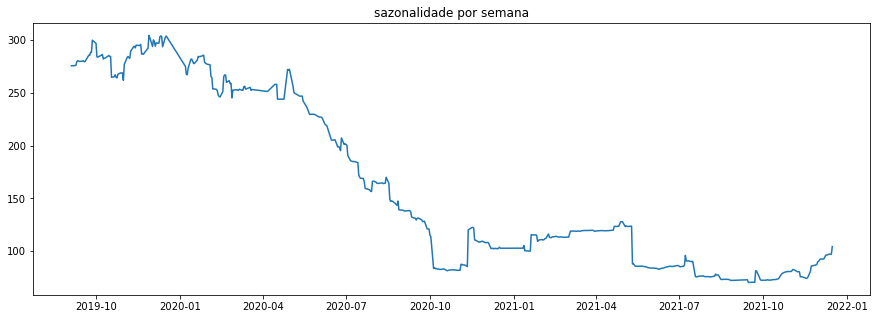

In [8]:
plt.figure(figsize=(15,5))
graf_dados7 = df[['Quantidade','Data']].groupby('Data').sum().rolling(90).mean()
plt.plot(graf_dados7.index, graf_dados7.values)
plt.title('sazonalidade por semana')

Text(0.5, 1.0, 'Gráfico de saídas de produtos por mês')

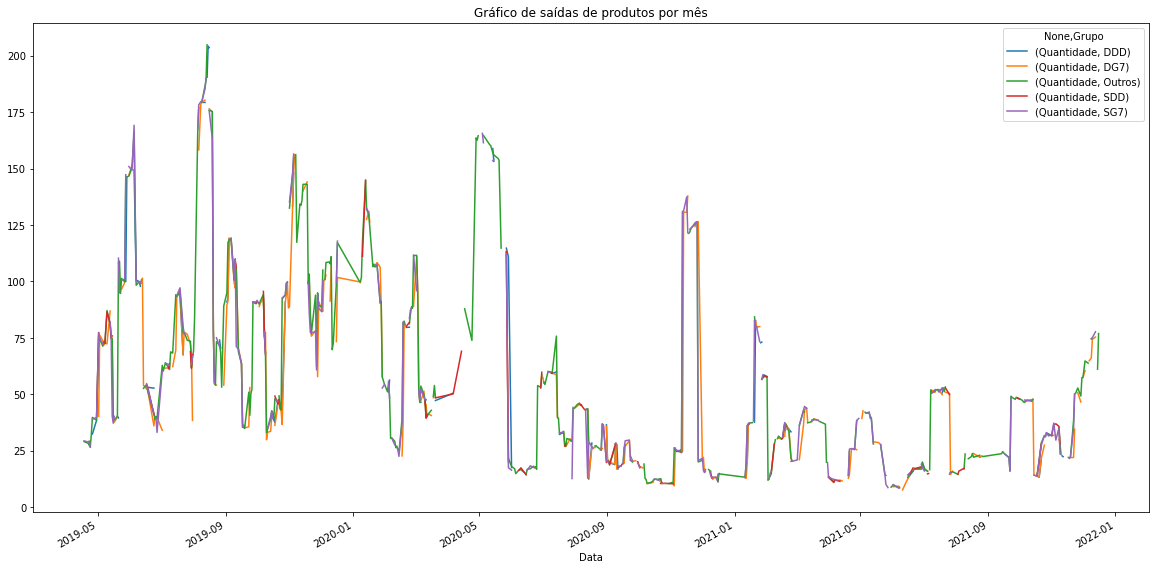

In [9]:
df.Quantidade.index
fig, ax = plt.subplots(figsize=(20,10))
graf_dados8 = df[['Quantidade','Grupo','Data']].groupby(['Data','Grupo']).sum().rolling(30).mean().unstack().plot(ax=ax)
plt.title('Gráfico de saídas de produtos por mês')

In [10]:
df['Ano'] = pd.DatetimeIndex(df.Data).year
df

,Unnamed: 0,Data,Produto,Quantidade,Cod,Grupo,Ano
0,0,2019-04-03,(11009959)MODULO SELETORA DE AUDIO NOVO,12,11009959,DG7,2019
1,1,2019-04-03,(11384826)RELE TEMPORIZADOR,2,11384826,Outros,2019
2,2,2019-04-03,(10908310)PAINEL SELETORA,40,10908310,SDD,2019
3,3,2019-04-03,(10674812)PAINEL SELETORA (SELETORA),10,10674812,SG7,2019
4,4,2019-04-05,(10527249)ANUNCIADOR FECHAMENTO DE PORTAS,3,10527249,Outros,2019
...,...,...,...,...,...,...,...
3756,968,2021-12-16,(11643930)PAINEL SELETORA G7 CAN,30,11643930,SG7,2021
3757,969,2021-12-16,(11643930)PAINEL SELETORA G7 CAN,10,11643930,SG7,2021
3758,970,2021-12-16,(964)MODULO SELETORA DE AUDIO DD CAN,1,964,Outros,2021
3759,971,2021-12-16,(937)PAINEL SELETORA DD CAN,4,937,Outros,2021


Text(0.5, 1.0, 'Gráfico de saidas por ano')

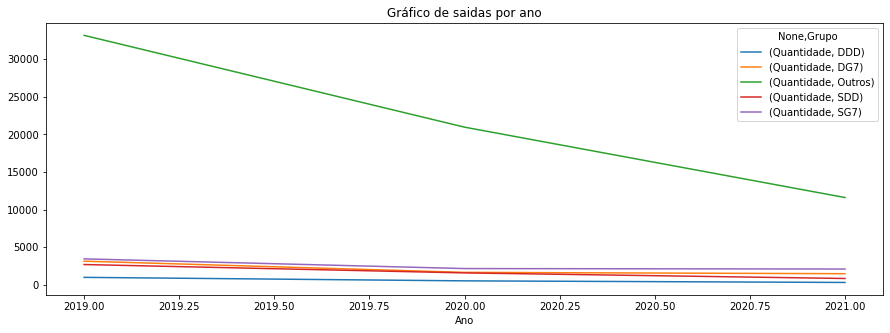

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
graf_dados10 = df[['Quantidade','Grupo','Ano']].groupby(['Ano','Grupo']).sum().unstack().plot(ax=ax)
plt.title('Gráfico de saidas por ano')

Text(0.5, 1.0, 'Saídas de todos produtos por ano')

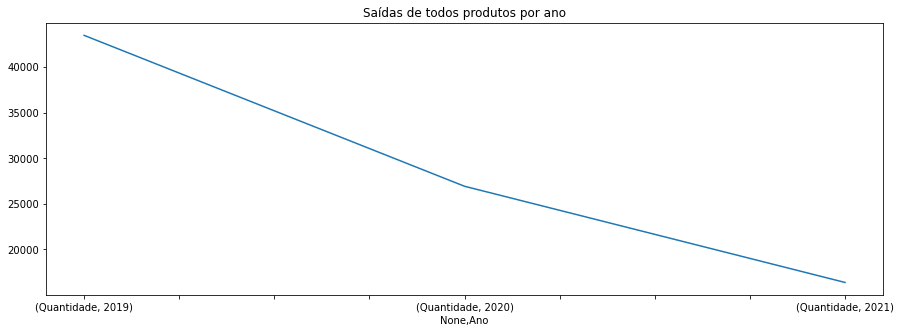

In [12]:
fig, ax =plt.subplots(figsize=(15,5))
graf_dados10 = df[['Quantidade', 'Ano']].groupby(['Ano']).sum().unstack().plot(ax=ax) 
plt.title('Saídas de todos produtos por ano')


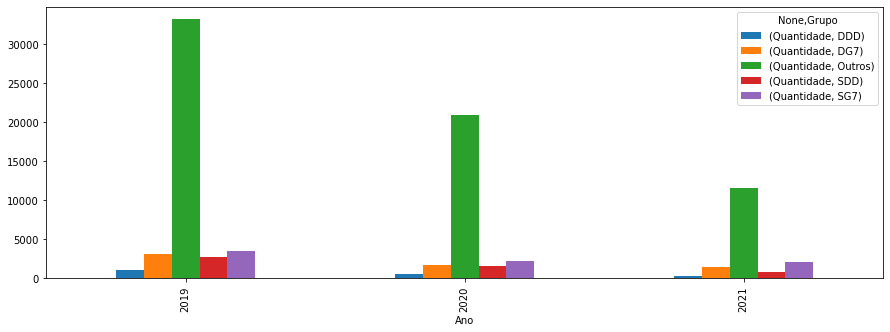

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
graf_dados11 = df[['Quantidade','Grupo','Ano']].groupby(['Ano', 'Grupo']).sum().unstack().plot.bar(ax=ax)

In [14]:
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [15]:
df

,Unnamed: 0,Data,Produto,Quantidade,Cod,Grupo,Ano
0,0,2019-04-03,(11009959)MODULO SELETORA DE AUDIO NOVO,12,11009959,DG7,2019
1,1,2019-04-03,(11384826)RELE TEMPORIZADOR,2,11384826,Outros,2019
2,2,2019-04-03,(10908310)PAINEL SELETORA,40,10908310,SDD,2019
3,3,2019-04-03,(10674812)PAINEL SELETORA (SELETORA),10,10674812,SG7,2019
4,4,2019-04-05,(10527249)ANUNCIADOR FECHAMENTO DE PORTAS,3,10527249,Outros,2019
...,...,...,...,...,...,...,...
3756,968,2021-12-16,(11643930)PAINEL SELETORA G7 CAN,30,11643930,SG7,2021
3757,969,2021-12-16,(11643930)PAINEL SELETORA G7 CAN,10,11643930,SG7,2021
3758,970,2021-12-16,(964)MODULO SELETORA DE AUDIO DD CAN,1,964,Outros,2021
3759,971,2021-12-16,(937)PAINEL SELETORA DD CAN,4,937,Outros,2021


In [16]:
DistG7 = df[df.Grupo == 'DG7'].iloc[:,[1,3]]
DistDD = df[df.Grupo == 'DDD'].iloc[:,[1,3]]
SeleG7 = df[df.Grupo == 'SG7'].iloc[:,[1,3]]
SeleDD = df[df.Grupo == 'SDD'].iloc[:,[1,3]]

In [17]:
index = pd.DatetimeIndex(DistG7.Data) #Transformar coluna "Date" em datetime

In [18]:
# DistG7 = DistG7.set_index('Data')

In [19]:
DistG7

,Data,Quantidade
0,2019-04-03,12
7,2019-04-05,10
8,2019-04-05,10
15,2019-04-08,10
16,2019-04-08,10
...,...,...
3736,2021-12-10,1
3737,2021-12-10,3
3747,2021-12-13,10
3748,2021-12-13,10


In [20]:
# DistG7['2019':'2020-02']

In [21]:
DistG7.dtypes

Data          datetime64[ns]
Quantidade             int64
dtype: object

# Juntando valores no mes

In [22]:
dfDG7 = DistG7.resample('M', on= 'Data').sum() # Para usar essa função não pode estar com a data index -= removi na linha 18

In [23]:
dfDG7#[dfDG7.Quantidade < 56] = 80 

,Quantidade
Data,
2019-04-30,288
2019-05-31,417
2019-06-30,248
2019-07-31,400
2019-08-31,367
2019-09-30,315
2019-10-31,430
2019-11-30,373
2019-12-31,316


# Juntando valores por semana

In [24]:
# G7Semana = DistG72.resample('D').interpolate()[::7] #Para esse precisa indexar ## DEU ERRo VER PQ

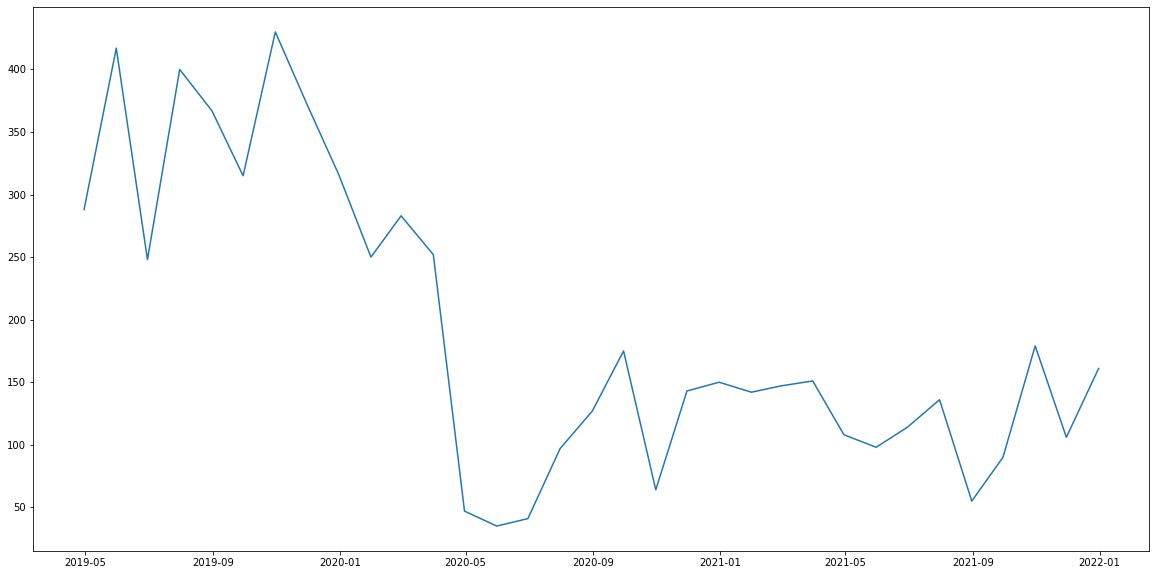

In [25]:
plt.figure(figsize=(20,10))
plt.plot(dfDG7)

# Se quiser de todos os meses somados (de todos anos)

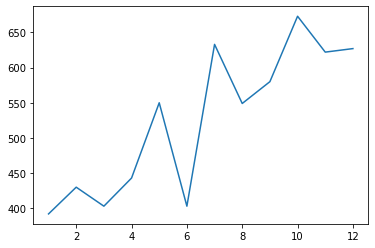

In [26]:
dfmes = dfDG7.groupby([lambda x: x.month]).sum()
plt.plot(dfmes)

In [27]:
dfm1

NameError: name 'dfm1' is not defined

In [28]:
plt.plot(dfm1)
plt.xticks(rotation=90)
plt.show()

NameError: name 'dfm1' is not defined

In [29]:
decomp = seasonal_decompose(dfDG7)

In [30]:
tendencia = decomp.trend
sazonal = decomp.seasonal
aleatorio = decomp.resid

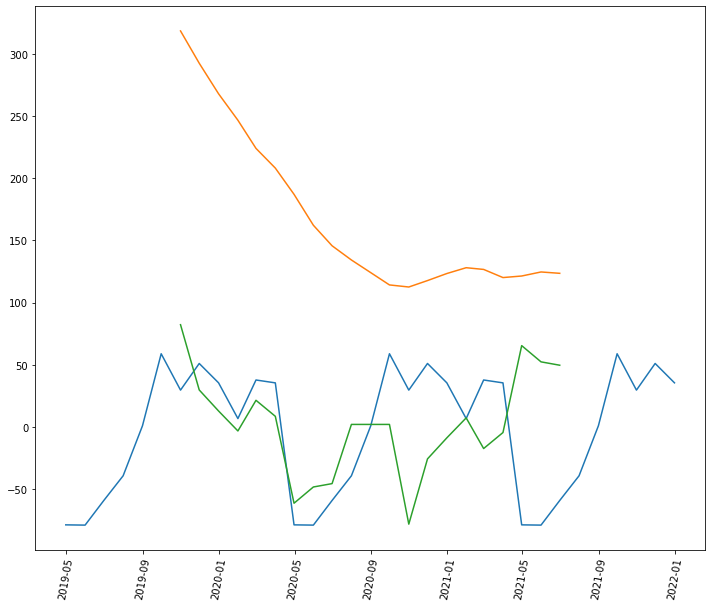

In [31]:
plt.figure(figsize=(12,10))
plt.plot(sazonal)
plt.plot(tendencia)
plt.plot(aleatorio)
plt.xticks(rotation=80)
plt.show()

# Pesquisar sobre tendencia sazonal e aleatório para TCC

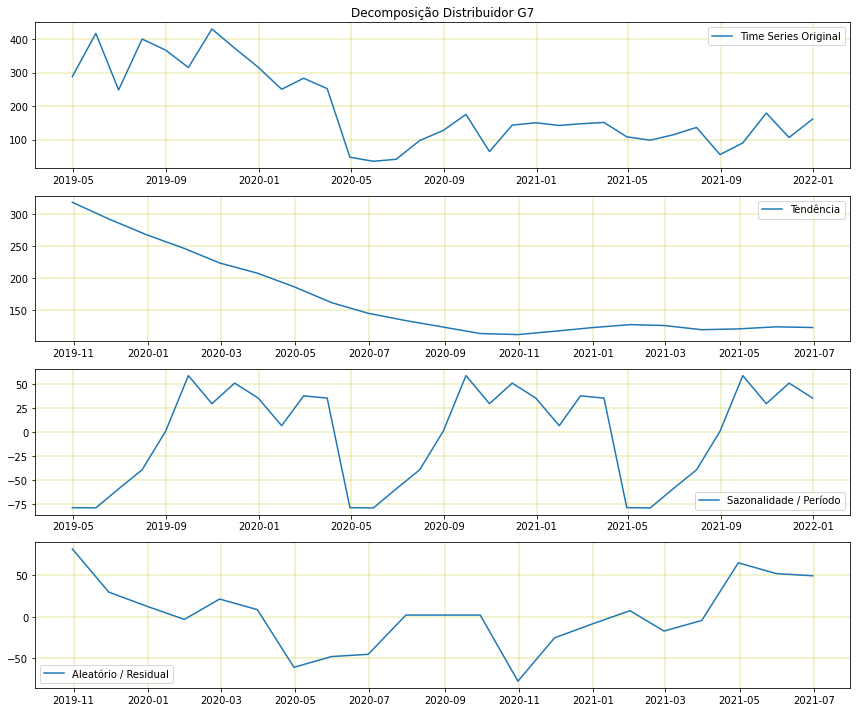

In [32]:
plt.figure(figsize=(12,10))
plt.subplot(411)
plt.title('Decomposição Distribuidor G7')
plt.grid(color='y', linestyle='-', linewidth=0.4)
plt.plot(dfDG7,label='Time Series Original')
plt.legend(loc='best')
plt.subplot(412)
plt.grid(color='y', linestyle='-', linewidth=0.4)
plt.plot(tendencia,label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.grid(color='y', linestyle='-', linewidth=0.4)
plt.plot(sazonal,label='Sazonalidade / Período')
plt.legend(loc='best')
plt.subplot(414)
plt.grid(color='y', linestyle='-', linewidth=0.4)
plt.plot(aleatorio,label='Aleatório / Residual')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig('decomposition.png')
 

# Teste ARIMA

In [33]:
len(dfDG7)

33

In [34]:
treino = dfDG7[:30]
treino.index.min(), treino.index.max() 

(Timestamp('2019-04-30 00:00:00', freq='M'),
 Timestamp('2021-09-30 00:00:00', freq='M'))

In [35]:
teste = dfDG7[30:]
teste.index.min(), teste.index.max()

(Timestamp('2021-10-31 00:00:00', freq='M'),
 Timestamp('2021-12-31 00:00:00', freq='M'))

In [36]:
modelo = auto_arima(treino, seasonal = True, order=( 8,5,2))

In [37]:
previsao = pd.DataFrame(modelo.predict(n_periods=3), index=teste.index)
previsao.columns = ['Previsão de Distribuidor G7']

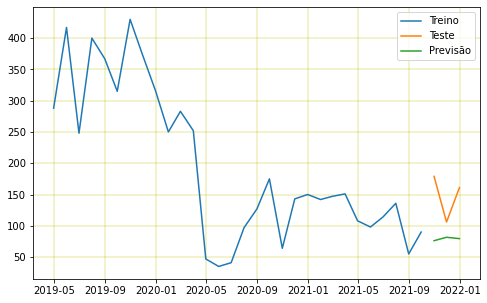

In [38]:
plt.figure(figsize=(8,5))
plt.grid(color='y', linestyle='-', linewidth=0.4)
plt.plot(treino, label='Treino')
plt.plot(teste, label='Teste')
plt.plot(previsao, label = 'Previsão')
plt.legend();

In [39]:
## Verificando se é uma distribuição normal (tive que transformar em Series)

In [40]:
import scipy.stats as stats

In [41]:
G7 = pd.Series(dfDG7['Quantidade'].values, index=dfDG7.index)

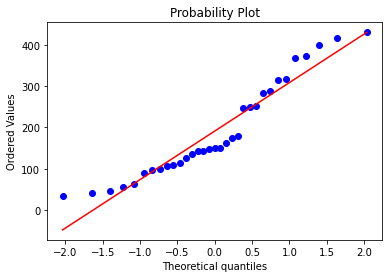

In [42]:
stats.probplot(G7, dist='norm', plot=plt)
plt.show()

## Teste Shapiro-Wiki

In [43]:
# p > 0,05 ou 5% 
e, p = stats.shapiro(G7)
print('Estatistica de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatistica de teste: 0.9133793711662292
p-valor: 0.012063571251928806


In [44]:
# não é uma distribuição normal

In [45]:
G7.describe()

count     33.000000
mean     191.060606
std      117.735386
min       35.000000
25%      106.000000
50%      150.000000
75%      283.000000
max      430.000000
dtype: float64

# Teste Estacionário

In [46]:
import statsmodels.tsa.stattools

In [47]:
statsmodels.tsa.stattools.kpss(G7)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.34436004275364046,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [48]:
# Teste < Crítico entao é estácionaria

## Grafico de auto correlação

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

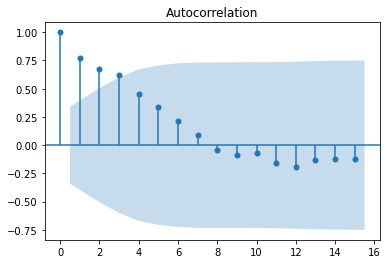

In [50]:
plot_acf(G7, lags=15);

In [51]:
# Talvez nao exista correlação

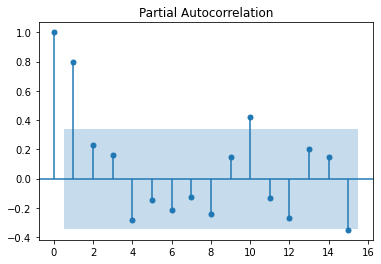

In [52]:
plot_pacf(G7, lags=15);

# AULA 41 Explica tendencia sazonalidade e residuo

# Transformação para distribuição normal com BOX-COX

## AULA 43 Função

In [53]:
g7 = np.log(G7)

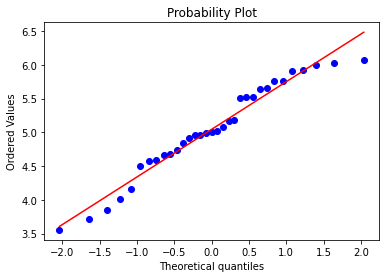

In [54]:
stats.probplot(g7, dist='norm', plot=plt)
plt.show()

In [55]:
# p > 0,05 ou 5% 
e, p = stats.shapiro(g7)
print('Estatistica de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatistica de teste: 0.9547484517097473
p-valor: 0.1828383505344391


In [56]:
## Com Raiz Cubica, se não melhorar ou para valores negativos ou igual a zero

In [57]:
g72 = (G7)**(1/3)

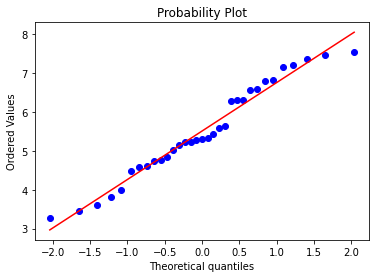

In [58]:
stats.probplot(g72, dist='norm', plot=plt)
plt.show()

In [59]:
# p > 0,05 ou 5% 
e, p = stats.shapiro(g72)
print('Estatistica de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatistica de teste: 0.9608780741691589
p-valor: 0.27363306283950806


## Vizualizar normalização com SNS

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

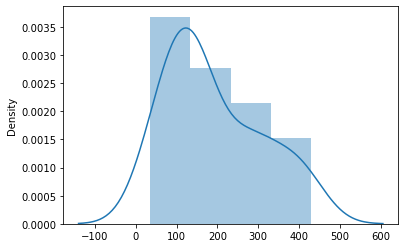

In [60]:
sns.distplot(G7)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

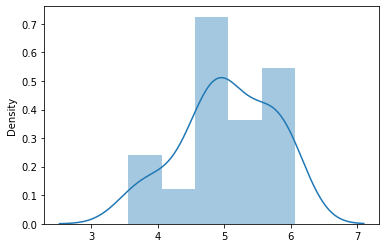

In [61]:
sns.distplot(g7)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

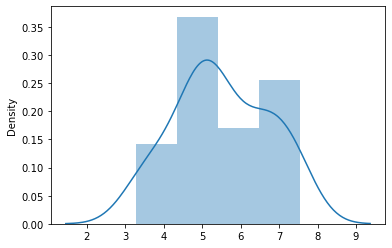

In [62]:
sns.distplot(g72)

# Transformação para estácionaridade (O G7 já é, então não precisa)

In [63]:
statsmodels.tsa.stattools.kpss(g7)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.3134507626938114,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

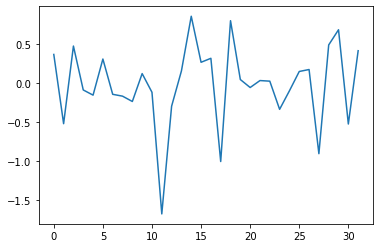

In [64]:
g7a = np.diff(g7) #Sem tendencia
plt.plot(g7a);

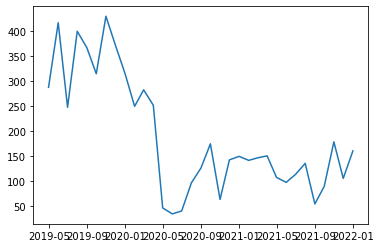

In [65]:
plt.plot(G7);

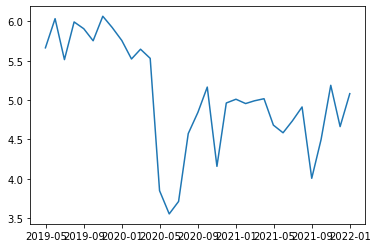

In [66]:
plt.plot(g7);

In [67]:
## Fazer uma nova diferenciação para ver se melhora

In [68]:
g7b = np.diff(g7a)

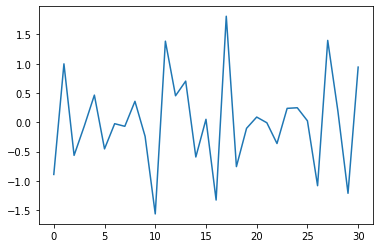

In [69]:
plt.plot(g7b);

In [70]:
statsmodels.tsa.stattools.kpss(g7a)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.1957046551349965,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [71]:
statsmodels.tsa.stattools.kpss(g7b)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.27333992530669265,
 0.1,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [72]:
#Portanto g7a é melhor

# Média móvel (suavização das series temporais) usada para tendência

## Media móvel simples

In [73]:
media_movel1 = G7.rolling(window=6)

In [74]:
media_movel1 = media_movel1.mean()

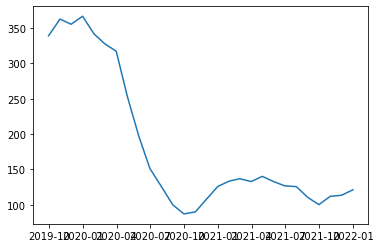

In [75]:
plt.plot(media_movel1);

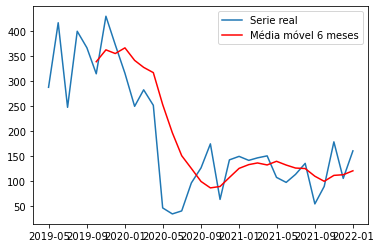

In [76]:
plt.plot(G7, label = 'Serie real')
plt.plot(media_movel1, color='red', label = 'Média móvel 6 meses')
plt.legend(loc='best');

## Média média Centralizada

In [77]:
media_movel2 = G7.rolling(window=6, center = True)

In [78]:
media_movel2 = media_movel2.mean()

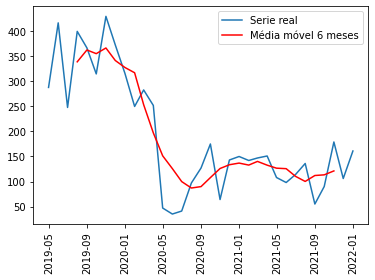

In [79]:
plt.plot(G7, label = 'Serie real')
plt.plot(media_movel2, color='red', label = 'Média móvel 6 meses')
plt.xticks(rotation=90)
plt.legend(loc='best');

## Voltando para a previsão - para fazer mais organizado, ver aula 54

In [80]:
# Auto correlação

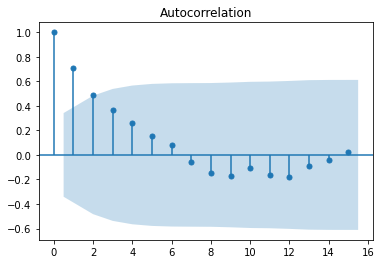

In [81]:
plot_acf(g7, lags=15);

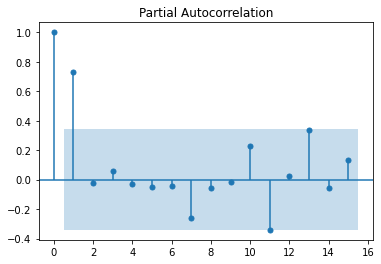

In [82]:
plot_pacf(g7, lags=15);

# Previsão com AR

In [83]:
from statsmodels.tsa.arima_model import ARIMA

In [84]:
g7

Data
2019-04-30    5.662960
2019-05-31    6.033086
2019-06-30    5.513429
2019-07-31    5.991465
2019-08-31    5.905362
2019-09-30    5.752573
2019-10-31    6.063785
2019-11-30    5.921578
2019-12-31    5.755742
2020-01-31    5.521461
2020-02-29    5.645447
2020-03-31    5.529429
2020-04-30    3.850148
2020-05-31    3.555348
2020-06-30    3.713572
2020-07-31    4.574711
2020-08-31    4.844187
2020-09-30    5.164786
2020-10-31    4.158883
2020-11-30    4.962845
2020-12-31    5.010635
2021-01-31    4.955827
2021-02-28    4.990433
2021-03-31    5.017280
2021-04-30    4.682131
2021-05-31    4.584967
2021-06-30    4.736198
2021-07-31    4.912655
2021-08-31    4.007333
2021-09-30    4.499810
2021-10-31    5.187386
2021-11-30    4.663439
2021-12-31    5.081404
Freq: M, dtype: float64

In [85]:
treino1 = g7[:30]
treino1.index.min(), treino1.index.max() 

(Timestamp('2019-04-30 00:00:00', freq='M'),
 Timestamp('2021-09-30 00:00:00', freq='M'))

In [86]:
teste1 = g7[30:]
teste1

Data
2021-10-31    5.187386
2021-11-30    4.663439
2021-12-31    5.081404
Freq: M, dtype: float64

In [87]:
#  AR - (p,0,0)

In [88]:
modelo_ar = ARIMA(treino1, order=(7,0,0));

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [89]:
resultado = modelo_ar.fit()
print(resultado.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   30
Model:                     ARMA(7, 0)   Log Likelihood                 -19.931
Method:                       css-mle   S.D. of innovations              0.462
Date:                Sat, 14 May 2022   AIC                             57.862
Time:                        13:51:30   BIC                             70.473
Sample:                    04-30-2019   HQIC                            61.897
                         - 09-30-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0269      0.246     20.461      0.000       4.545       5.508
ar.L1.y        0.7442      0.176      4.230      0.000       0.399       1.089
ar.L2.y       -0.0017      0.243     -0.007      0.9

## Verificar AIC do modelo - menor valor = melhor - ver o grafico autocorrelação

In [90]:
# menor foi (1,0,0)  AIC = 47,466

## Analisar os residuos

In [91]:
residuos = resultado.resid

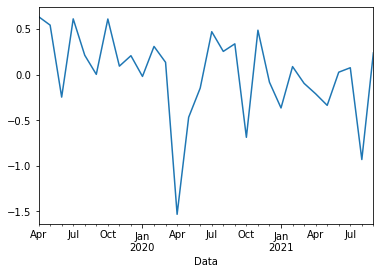

In [92]:
residuos.plot();

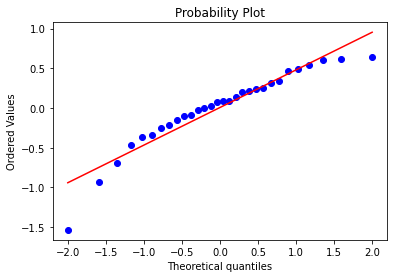

In [93]:
stats.probplot(residuos, dist='norm', plot=plt);

In [94]:
# p > 0,05 ou 5% 
e, p = stats.shapiro(residuos)
print('Estatistica de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatistica de teste: 0.9105221033096313
p-valor: 0.015338803641498089


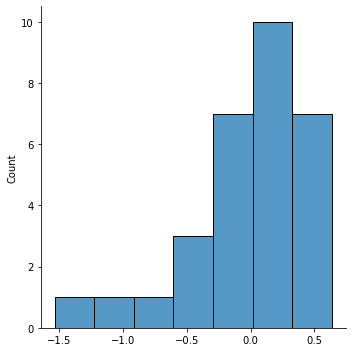

In [95]:
sns.displot(residuos) # RUim deveria estar normalizada

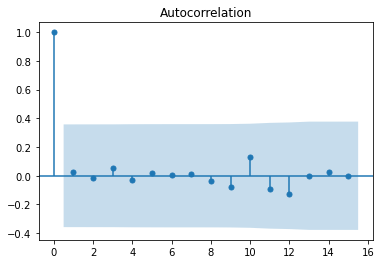

In [96]:
plot_acf(residuos, lags=15);

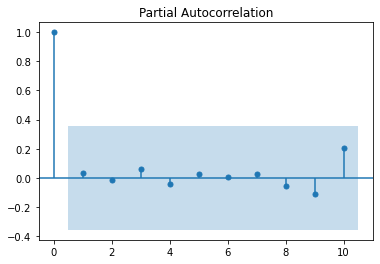

In [97]:
plot_pacf(residuos, lags=10);

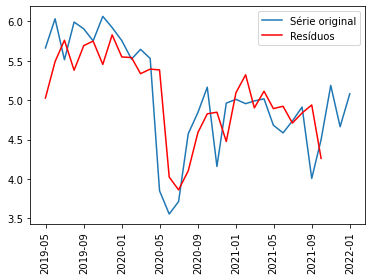

In [98]:
plt.plot(g7, label= 'Série original')
plt.plot(g7 - residuos, color='red', label = 'Resíduos')
plt.xticks(rotation=90)
plt.legend(loc='best');

In [99]:
resultado.fittedvalues

Data
2019-04-30    5.026944
2019-05-31    5.490206
2019-06-30    5.760703
2019-07-31    5.379894
2019-08-31    5.693259
2019-09-30    5.750053
2019-10-31    5.453690
2019-11-30    5.828973
2019-12-31    5.548461
2020-01-31    5.541693
2020-02-29    5.336404
2020-03-31    5.394820
2020-04-30    5.384137
2020-05-31    4.024352
2020-06-30    3.861910
2020-07-31    4.103947
2020-08-31    4.589670
2020-09-30    4.827242
2020-10-31    4.847499
2020-11-30    4.475665
2020-12-31    5.094845
2021-01-31    5.322280
2021-02-28    4.902792
2021-03-31    5.113937
2021-04-30    4.893193
2021-05-31    4.922828
2021-06-30    4.709989
2021-07-31    4.837544
2021-08-31    4.939856
2021-09-30    4.261577
Freq: M, dtype: float64

In [100]:
#previsão sem sparar treino e teste
previsão = resultado.predict(start=27,end=32)
previsão

2021-07-31    4.837544
2021-08-31    4.939856
2021-09-30    4.261577
2021-10-31    4.597100
2021-11-30    4.815142
2021-12-31    4.821882
Freq: M, dtype: float64

In [101]:
# Ou com forecast

In [102]:
previsao2 = resultado.forecast(5)
previsao2

(array([4.5970998 , 4.81514231, 4.82188227, 4.95739178, 4.86614235]),
 array([0.46155345, 0.57533838, 0.6292466 , 0.64645804, 0.66326479]),
 array([[3.69247166, 5.50172794],
        [3.68749981, 5.9427848 ],
        [3.5885816 , 6.05518294],
        [3.69035731, 6.22442626],
        [3.56616725, 6.16611745]]))

In [103]:
# pegar só primeiro array
previsao2[0]

array([4.5970998 , 4.81514231, 4.82188227, 4.95739178, 4.86614235])

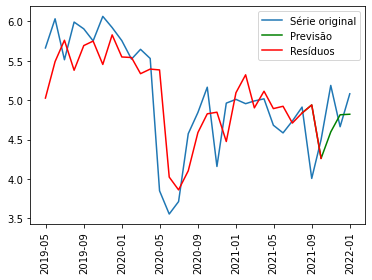

In [104]:
plt.plot(g7, label= 'Série original')
plt.plot(previsão, color = 'green', label = 'Previsão')
plt.plot(g7 - residuos, color='red', label = 'Resíduos')
plt.xticks(rotation=90)
plt.legend(loc='best');

In [105]:
## Voltando a escala

In [106]:
prev_escala = pd.DataFrame(previsão **3, columns=['Previsão'])
prev_escala

,Previsão
2021-07-31,113.207368
2021-08-31,120.543267
2021-09-30,77.394659
2021-10-31,97.152011
2021-11-30,111.641941
2021-12-31,112.111408


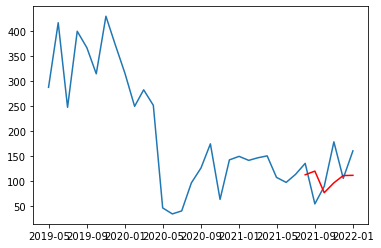

In [107]:
plt.plot(G7)
plt.plot(prev_escala, color ='red')

In [108]:
import warnings
warnings.filterwarnings("ignore")

# Método MA (Média Móvel) - (0,0,q)

In [109]:
modelo_ma = ARIMA(g7,order = (0,0,2))

In [110]:
resultado_ma = modelo_ma.fit()
print(resultado_ma.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   33
Model:                     ARMA(0, 2)   Log Likelihood                 -24.170
Method:                       css-mle   S.D. of innovations              0.499
Date:                Sat, 14 May 2022   AIC                             56.340
Time:                        13:51:34   BIC                             62.326
Sample:                    04-30-2019   HQIC                            58.354
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0586      0.173     29.232      0.000       4.719       5.398
ma.L1.y        0.7008      0.168      4.176      0.000       0.372       1.030
ma.L2.y        0.3306      0.160      2.062      0.0

In [111]:
# Modelo AR AIC - 57.862 (1,0,0)
# Modelo MA AIC - 56,34 (0,0,2)

## Análise de resíduos

In [112]:
residuos_ma = resultado_ma.resid

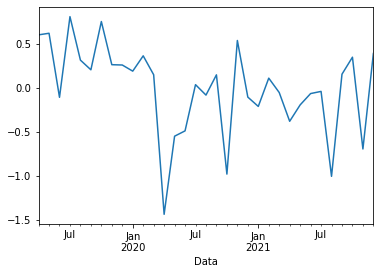

In [113]:
residuos_ma.plot();

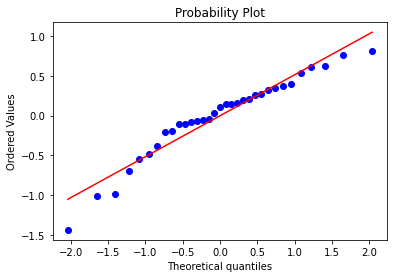

In [114]:
stats.probplot(residuos_ma,dist='norm',plot=plt);

In [115]:
# p > 0,05 ou 5% 
e, p = stats.shapiro(residuos_ma)
print('Estatistica de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatistica de teste: 0.9420517086982727
p-valor: 0.07794994115829468


In [116]:
# é normalizada

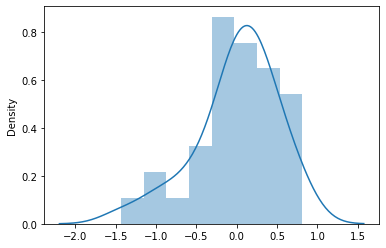

In [117]:
sns.distplot(residuos_ma);

## Ver Autocorrelação

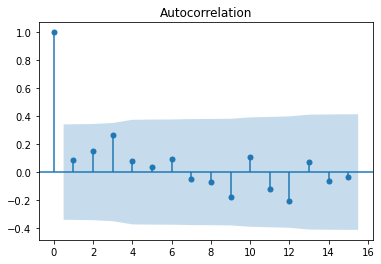

In [118]:
plot_acf(residuos_ma, lags=15);

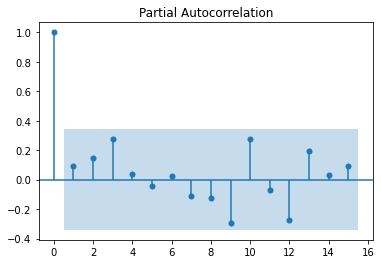

In [119]:
plot_pacf(residuos_ma, lags=15);

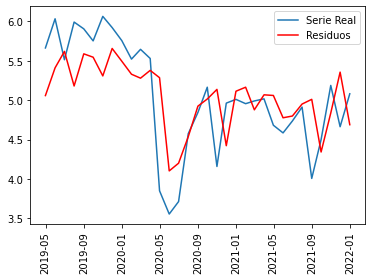

In [120]:
plt.plot(g7, label='Serie Real')
plt.plot(g7-residuos_ma, color='red', label= 'Residuos')
plt.xticks(rotation=90)
plt.legend(loc='best');

In [121]:
resultado_ma.fittedvalues

Data
2019-04-30    5.058648
2019-05-31    5.410749
2019-06-30    5.619046
2019-07-31    5.180273
2019-08-31    5.588269
2019-09-30    5.545623
2019-10-31    5.308151
2019-11-30    5.656436
2019-12-31    5.494174
2020-01-31    5.329595
2020-02-29    5.279577
2020-03-31    5.378476
2020-04-30    5.285390
2020-05-31    4.102746
2020-06-30    4.200550
2020-07-31    4.536410
2020-08-31    4.924496
2020-09-30    5.015030
2020-10-31    5.137046
2020-11-30    4.422668
2020-12-31    5.113823
2021-01-31    5.164916
2021-02-28    4.878007
2021-03-31    5.068311
2021-04-30    5.060053
2021-05-31    4.776932
2021-06-30    4.799181
2021-07-31    4.951048
2021-08-31    5.010921
2021-09-30    4.342649
2021-10-31    4.837002
2021-11-30    5.356151
2021-12-31    4.689036
Freq: M, dtype: float64

In [122]:
previsao_ma = resultado_ma.predict(start=27, end=32)
previsao_ma

Data
2021-07-31    4.951048
2021-08-31    5.010921
2021-09-30    4.342649
2021-10-31    4.837002
2021-11-30    5.356151
2021-12-31    4.689036
Freq: M, dtype: float64

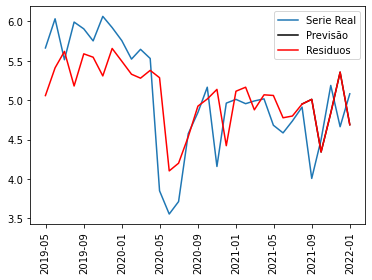

In [123]:
plt.plot(g7, label='Serie Real')
plt.plot(previsao_ma, color='black',label= 'Previsão')
plt.plot(g7-residuos_ma, color='red', label= 'Residuos')
plt.xticks(rotation=90)
plt.legend(loc='best');

In [124]:
prev_escala_ma = pd.DataFrame(previsao_ma **3, columns=['Previsão'])
prev_escala_ma

,Previsão
Data,
2021-07-31,121.364402
2021-08-31,125.820869
2021-09-30,81.896272
2021-10-31,113.169373
2021-11-30,153.659162
2021-12-31,103.098139


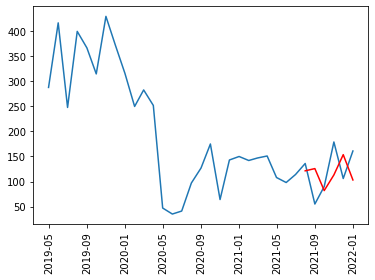

In [125]:
plt.plot(G7)
plt.xticks(rotation=90)
plt.plot(prev_escala_ma, color ='red')

# Modelo ARMA (Autoregressivo + Média móvel)

In [126]:
# Modelo (p,0,q)

In [127]:
modelo_arma = ARIMA(g7,order = (2,0,1))

In [128]:
resultado_arma = modelo_arma.fit()
print(resultado_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   33
Model:                     ARMA(2, 1)   Log Likelihood                 -22.484
Method:                       css-mle   S.D. of innovations              0.469
Date:                Sat, 14 May 2022   AIC                             54.969
Time:                        13:51:37   BIC                             62.451
Sample:                    04-30-2019   HQIC                            57.487
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0933      0.268     19.037      0.000       4.569       5.618
ar.L1.y       -0.2840      0.004    -75.826      0.000      -0.291      -0.277
ar.L2.y        0.7159      0.007     98.606      0.0

In [129]:
residuo_arma =  resultado_arma.resid

<AxesSubplot:xlabel='Data'>

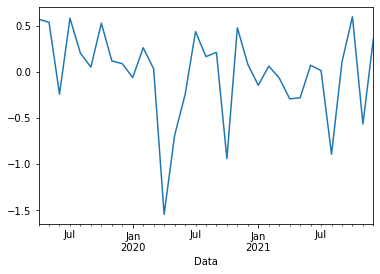

In [130]:
residuo_arma.plot()


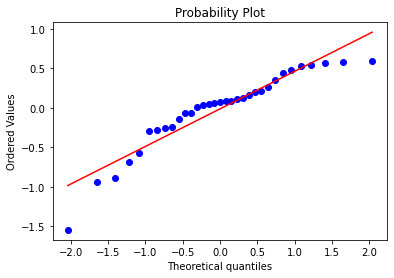

In [131]:
stats.probplot(residuo_arma,dist='norm',plot=plt);

In [132]:
# p > 0,05 ou 5% 
e, p = stats.shapiro(residuo_arma)
print('Estatistica de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatistica de teste: 0.8980470895767212
p-valor: 0.00474235275760293


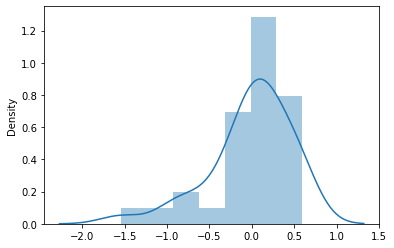

In [133]:
sns.distplot(residuo_arma);

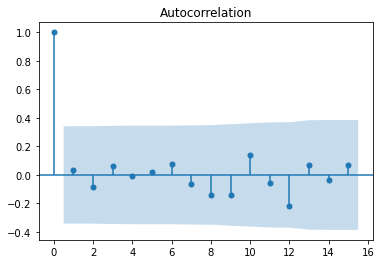

In [134]:
plot_acf(residuo_arma, lags=15);

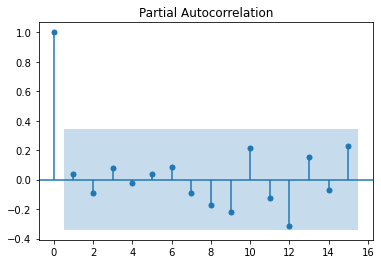

In [135]:
plot_pacf(residuo_arma, lags=15);

In [136]:
resultado_arma.fittedvalues

Data
2019-04-30    5.093267
2019-05-31    5.496464
2019-06-30    5.755743
2019-07-31    5.411054
2019-08-31    5.703936
2019-09-30    5.701847
2019-10-31    5.536837
2019-11-30    5.803590
2019-12-31    5.667959
2020-01-31    5.583823
2020-02-29    5.384987
2020-03-31    5.497600
2020-04-30    5.395826
2020-05-31    4.246096
2020-06-30    3.963888
2020-07-31    4.138967
2020-08-31    4.679772
2020-09-30    4.953938
2020-10-31    5.101395
2020-11-30    4.485280
2020-12-31    4.930025
2021-01-31    5.102498
2021-02-28    4.929118
2021-03-31    5.084310
2021-04-30    4.975365
2021-05-31    4.867418
2021-06-30    4.665599
2021-07-31    4.900220
2021-08-31    4.901170
2021-09-30    4.392868
2021-10-31    4.589654
2021-11-30    5.230133
2021-12-31    4.724695
Freq: M, dtype: float64

In [137]:
previsao_arma = resultado_arma.predict(start=27, end=32)
previsao_arma

Data
2021-07-31    4.900220
2021-08-31    4.901170
2021-09-30    4.392868
2021-10-31    4.589654
2021-11-30    5.230133
2021-12-31    4.724695
Freq: M, dtype: float64

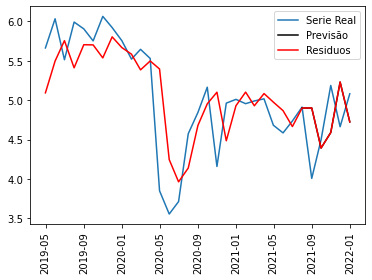

In [138]:
plt.plot(g7, label='Serie Real')
plt.plot(previsao_arma, color='black',label= 'Previsão')
plt.plot(g7-residuo_arma, color='red', label= 'Residuos')
plt.xticks(rotation=90)
plt.legend(loc='best');

In [139]:
prev_escala_arma = pd.DataFrame(previsao_arma **3, columns=['Previsão'])
prev_escala_arma

,Previsão
Data,
2021-07-31,117.664863
2021-08-31,117.733329
2021-09-30,84.770469
2021-10-31,96.680690
2021-11-30,143.066550
2021-12-31,105.468181


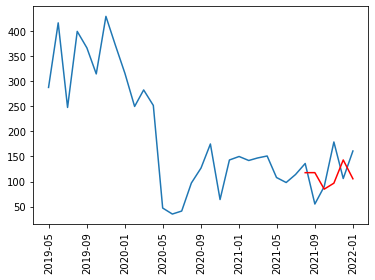

In [140]:
plt.plot(G7)
plt.xticks(rotation=90)
plt.plot(prev_escala_arma, color ='red')

# Model ARIMA

## Só precisa se a série não for estacionária (I) é a diferenciação

In [141]:
# Fazer depois ultimas aulas

# Modelo Auto  ARIMA

In [142]:
# trace = Apresenta a lista de modelos usados
# stepwise - seleção gradual - processo mais rápidp mas menos minucioso
#m - Período sazonal - no caso em meses 12 meses
modelo_auto= auto_arima(g7, trace = True, stepwise=False,seasonal=True, max_p=10, max_q=10, max_P=4, max_Q=4, start_p=0, start_q=0, start_P=0, start_Q=0,m=12)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=72.382, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=71.380, Time=0.60 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,0,4)[12] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=72.758, Time=0.11 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(1,0,4)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,0,0)(3,0,1)[12] intercept   : AIC=71.516, Time=0.82 

In [143]:
print(modelo_auto.aic())

51.22674029209392


In [144]:
resultado_auto = modelo_auto.fit(g7)
print(resultado_auto.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -22.613
Date:                Sat, 14 May 2022   AIC                             51.227
Time:                        13:52:37   BIC                             55.716
Sample:                             0   HQIC                            52.737
                                 - 33                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4961      0.761      1.967      0.049       0.005       2.987
ar.L1          0.7058      0.154      4.586      0.000       0.404       1.007
sigma2         0.2257      0.058      3.908      0.0

In [145]:
residuo_auto = resultado_auto.resid
residuo_auto()

array([ 5.77386752e-01,  5.39981745e-01, -2.40917645e-01,  6.03902463e-01,
        1.80392841e-01,  8.83765835e-02,  5.07430735e-01,  1.45564089e-01,
        8.01001881e-02, -3.71307027e-02,  2.52215552e-01,  4.86860364e-02,
       -1.54870783e+00, -6.58237988e-01, -2.91938759e-01,  4.57522586e-01,
        1.19190178e-01,  2.49587611e-01, -9.82600182e-01,  5.31347101e-01,
        1.16861393e-02, -7.68536730e-02, -3.56342940e-03, -1.14143185e-03,
       -3.55239350e-01, -2.15848721e-01,  3.96230328e-03,  7.36769942e-02,
       -9.56191076e-01,  1.75278993e-01,  5.15255691e-01, -4.93995570e-01,
        2.93781434e-01])

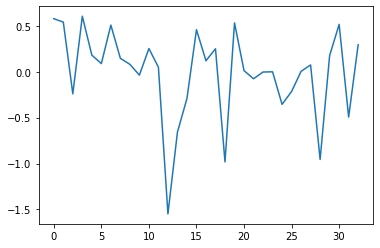

In [146]:
plt.plot(residuo_auto())

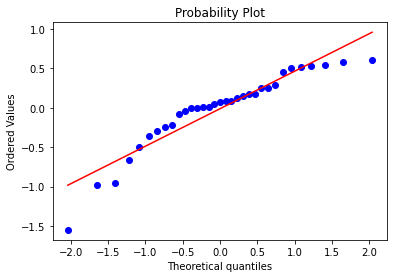

In [147]:
stats.probplot(residuo_auto(),dist='norm',plot=plt);

In [148]:
# p > 0,05 ou 5% 
e, p = stats.shapiro(residuo_auto())
print('Estatistica de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatistica de teste: 0.8903393149375916
p-valor: 0.0030195133294910192


<AxesSubplot:ylabel='Density'>

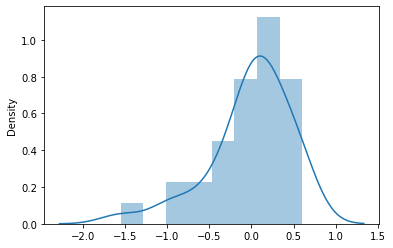

In [149]:
sns.distplot(residuo_auto())

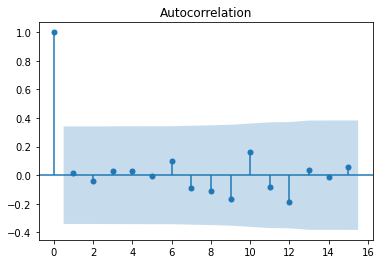

In [150]:
plot_acf(residuo_auto(), lags=15);

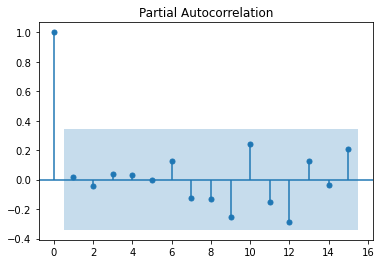

In [151]:
plot_pacf(residuo_auto(), lags=15);

In [152]:
previsao_auto = resultado_auto.predict(n_periods=12)
previsao_auto

array([5.08263091, 5.08349663, 5.08410767, 5.08453896, 5.08484337,
       5.08505823, 5.08520988, 5.08531691, 5.08539246, 5.08544579,
       5.08548343, 5.08550999])

In [153]:
auto_escala = pd.DataFrame(previsao_auto**3, columns=['Previsão Sarima - Auto'])
auto_escala

,Previsão Sarima - Auto
0,131.300301
1,131.367405
2,131.414782
3,131.448229
4,131.471839
5,131.488506
6,131.500270
7,131.508574
8,131.514436
9,131.518573


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(-10.0, 0, '2'),
  Text(0.0, 0, '2019-04-30 00:00:00'),
  Text(10.0, 0, '2020-02-29 00:00:00'),
  Text(20.0, 0, '2020-12-31 00:00:00'),
  Text(30.0, 0, '2021-10-31 00:00:00'),
  Text(40.0, 0, '7'),
  Text(50.0, 0, '')])

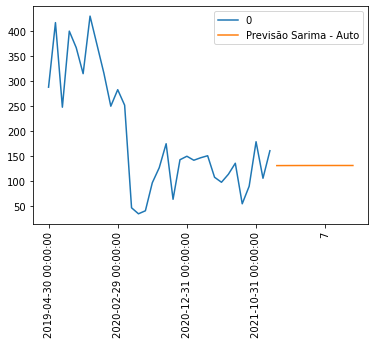

In [154]:
pd.concat([G7,auto_escala]).plot()
plt.xticks(rotation=90)

# Modelos de teste

In [155]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [156]:
G7.tail()

Data
2021-08-31     55
2021-09-30     90
2021-10-31    179
2021-11-30    106
2021-12-31    161
Freq: M, dtype: int64

In [157]:
lista = [55,90,179,106,161]

In [158]:
valores_reais = pd.DataFrame(lista, columns= ['Valores reais'])

In [159]:
valores_reais

,Valores reais
0,55
1,90
2,179
3,106
4,161


In [160]:
auto = auto_escala.iloc[0:5]
auto

,Previsão Sarima - Auto
0,131.300301
1,131.367405
2,131.414782
3,131.448229
4,131.471839


In [161]:
desempenho = 'a'

In [162]:
desempenho = pd.concat([valores_reais,auto], axis = 1)
desempenho

,Valores reais,Previsão Sarima - Auto
0,55,131.300301
1,90,131.367405
2,179,131.414782
3,106,131.448229
4,161,131.471839


In [163]:
ar = prev_escala.iloc[1:6]
ar
ar = ar.rename(columns={'Previsão': 'Prev ar'})

In [164]:
pd.DataFrame.reset_index(ar, drop=True, inplace=True)
ar

,Prev ar
0,120.543267
1,77.394659
2,97.152011
3,111.641941
4,112.111408


In [165]:
ma = prev_escala_ma.iloc[1:6]
ma

,Previsão
Data,
2021-08-31,125.820869
2021-09-30,81.896272
2021-10-31,113.169373
2021-11-30,153.659162
2021-12-31,103.098139


In [166]:
pd.DataFrame.reset_index(ma, drop=True, inplace=True)
ma

,Previsão
0,125.820869
1,81.896272
2,113.169373
3,153.659162
4,103.098139


In [167]:
desempenho = pd.concat([desempenho, ar, ma],axis=1)
desempenho

,Valores reais,Previsão Sarima - Auto,Prev ar,Previsão
0,55,131.300301,120.543267,125.820869
1,90,131.367405,77.394659,81.896272
2,179,131.414782,97.152011,113.169373
3,106,131.448229,111.641941,153.659162
4,161,131.471839,112.111408,103.098139


In [168]:
print('Erro médio absoluto (MAE)')
mae_auto = mean_absolute_error(desempenho['Valores reais'], desempenho['Previsão Sarima - Auto'])
print('SARIMA: {:.2f}'.format(mae_auto))
mae_ar = mean_absolute_error(desempenho['Valores reais'], desempenho['Prev ar'])
print('AR: {:.2f}'.format(mae_ar))
mae_ma = mean_absolute_error(desempenho['Valores reais'], desempenho['Previsão'])
print('MA: {:.2f}'.format(mae_ma))


Erro médio absoluto (MAE)
SARIMA: 44.05
AR: 42.91
MA: 50.06


In [169]:
print('Erro Quadrático Médio (MSE)')
mse_auto = mean_squared_error(desempenho['Valores reais'], desempenho['Previsão Sarima - Auto'])
print('SARIMA: {:.2f}'.format(mse_auto))
mse_ar = mean_squared_error(desempenho['Valores reais'], desempenho['Prev ar'])
print('AR: {:.2f}'.format(mse_ar))
mse_ma = mean_squared_error(desempenho['Valores reais'], desempenho['Previsão'])
print('MA: {:.2f}'.format(mse_ma))

Erro Quadrático Médio (MSE)
SARIMA: 2263.38
AR: 2715.17
MA: 3007.79


In [170]:
print('Raiz Erro Quadrático Médio (RMSE)')
rmse_auto = mean_squared_error(desempenho['Valores reais'], desempenho['Previsão Sarima - Auto'], squared = False)
print('SARIMA: {:.2f}'.format(rmse_auto))
rmse_ar = mean_squared_error(desempenho['Valores reais'], desempenho['Prev ar'], squared = False)
print('AR: {:.2f}'.format(rmse_ar))
rmse_ma = mean_squared_error(desempenho['Valores reais'], desempenho['Previsão'], squared = False)
print('MA: {:.2f}'.format(rmse_ma))

Raiz Erro Quadrático Médio (RMSE)
SARIMA: 47.57
AR: 52.11
MA: 54.84
